<a href="https://colab.research.google.com/github/noahbean33/computational_physics_experiments/blob/main/numba_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import time
from numba import jit

# Define a function without Numba
def sum_of_squares(arr):
    result = 0
    for i in arr:
        result += i ** 2
    return result

# Define the same function with Numba
@jit(nopython=True)
def sum_of_squares_numba(arr):
    result = 0
    for i in arr:
        result += i ** 2
    return result

# Generate a large array
arr = np.random.rand(10**6)

# Measure execution time without Numba
start = time.time()
sum_of_squares(arr)
print("Without Numba:", time.time() - start)

# Measure execution time with Numba
start = time.time()
sum_of_squares_numba(arr)
print("With Numba:", time.time() - start)


Without Numba: 0.22797608375549316
With Numba: 0.741995096206665


In [2]:
import numpy as np
import time
from numba import jit

# Define matrix multiplication without Numba
def matrix_multiply(A, B):
    result = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                result[i, j] += A[i, k] * B[k, j]
    return result

# Define matrix multiplication with Numba
@jit(nopython=True)
def matrix_multiply_numba(A, B):
    result = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                result[i, j] += A[i, k] * B[k, j]
    return result

# Generate random matrices
A = np.random.rand(500, 500)
B = np.random.rand(500, 500)

# Measure execution time without Numba
start = time.time()
matrix_multiply(A, B)
print("Without Numba:", time.time() - start)

# Measure execution time with Numba
start = time.time()
matrix_multiply_numba(A, B)
print("With Numba:", time.time() - start)


Without Numba: 76.4583854675293
With Numba: 0.5585415363311768


Without Numba: 12.998433351516724
With Numba: 1.7402808666229248


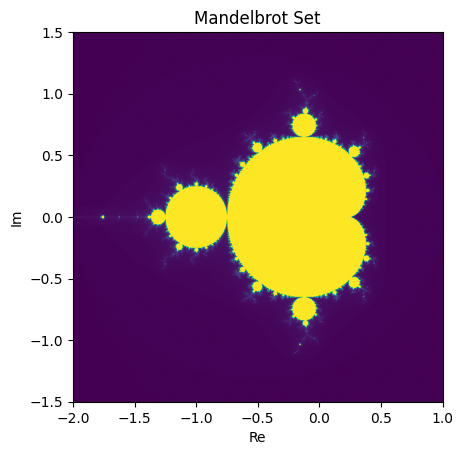

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

# Define Mandelbrot function without Numba
def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

# Define Mandelbrot set without Numba
def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            n3[i, j] = mandelbrot(r1[i] + 1j*r2[j], max_iter)
    return (r1, r2, n3)

# Define Mandelbrot function with Numba
@jit(nopython=True)
def mandelbrot_numba(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

# Define Mandelbrot set with Numba
@jit(nopython=True, parallel=True)
def mandelbrot_set_numba(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            n3[i, j] = mandelbrot_numba(r1[i] + 1j*r2[j], max_iter)
    return (r1, r2, n3)

# Parameters
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
width, height, max_iter = 1000, 1000, 256

# Generate Mandelbrot set without Numba
start = time.time()
_, _, mandelbrot_image = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
print("Without Numba:", time.time() - start)

# Generate Mandelbrot set with Numba
start = time.time()
_, _, mandelbrot_image_numba = mandelbrot_set_numba(xmin, xmax, ymin, ymax, width, height, max_iter)
print("With Numba:", time.time() - start)

# Plot the Mandelbrot set
plt.imshow(mandelbrot_image.T, extent=[xmin, xmax, ymin, ymax])
plt.title('Mandelbrot Set')
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()


In [4]:
import numpy as np
import time
from numba import jit

# Define Fibonacci function recursively without Numba
def fibonacci_recursive(n):
    if n <= 1:
        return n
    else:
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

# Define Fibonacci function recursively with Numba
@jit(nopython=True)
def fibonacci_recursive_numba(n):
    if n <= 1:
        return n
    else:
        return fibonacci_recursive_numba(n-1) + fibonacci_recursive_numba(n-2)

# Define Fibonacci function iteratively without Numba
def fibonacci_iterative(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

# Define Fibonacci function iteratively with Numba
@jit(nopython=True)
def fibonacci_iterative_numba(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

# Test the functions
n = 30

# Measure execution time for recursive Fibonacci without Numba
start = time.time()
print("Fibonacci Recursive (Without Numba):", fibonacci_recursive(n))
print("Execution Time:", time.time() - start)

# Measure execution time for recursive Fibonacci with Numba
start = time.time()
print("Fibonacci Recursive (With Numba):", fibonacci_recursive_numba(n))
print("Execution Time:", time.time() - start)

# Measure execution time for iterative Fibonacci without Numba
start = time.time()
print("Fibonacci Iterative (Without Numba):", fibonacci_iterative(n))
print("Execution Time:", time.time() - start)

# Measure execution time for iterative Fibonacci with Numba
start = time.time()
print("Fibonacci Iterative (With Numba):", fibonacci_iterative_numba(n))
print("Execution Time:", time.time() - start)


Fibonacci Recursive (Without Numba): 832040
Execution Time: 0.2964746952056885
Fibonacci Recursive (With Numba): 832040
Execution Time: 0.08661723136901855
Fibonacci Iterative (Without Numba): 832040
Execution Time: 0.0015997886657714844
Fibonacci Iterative (With Numba): 832040
Execution Time: 0.0657508373260498


In [5]:
# Warm-up for Numba functions
_ = sum_of_squares_numba(arr)
_ = matrix_multiply_numba(A, B)
_ = mandelbrot_set_numba(xmin, xmax, ymin, ymax, width, height, max_iter)
_ = fibonacci_recursive_numba(n)
_ = fibonacci_iterative_numba(n)


In [6]:
# Larger arrays for sum of squares
large_arr = np.random.rand(10**7)

# Larger matrices for multiplication
large_A = np.random.rand(1000, 1000)
large_B = np.random.rand(1000, 1000)


In [7]:
from scipy.integrate import odeint

# Differential Equation Solver
def model(y, t):
    dydt = -y
    return dydt

y0 = 5
t = np.linspace(0, 20, 1000)

# Without Numba
def solve_ode(y0, t):
    return odeint(model, y0, t)

# With Numba
@jit(nopython=True)
def solve_ode_numba(y0, t):
    return odeint(model, y0, t)

# Measure execution time
start = time.time()
solve_ode(y0, t)
print("ODE Solver Without Numba:", time.time() - start)

start = time.time()
solve_ode_numba(y0, t)
print("ODE Solver With Numba:", time.time() - start)


ODE Solver Without Numba: 0.0005552768707275391


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'odeint': Cannot determine Numba type of <class 'function'>

File "<ipython-input-7-257e391590d8>", line 18:
def solve_ode_numba(y0, t):
    return odeint(model, y0, t)
    ^


In [8]:
from numba import prange

@jit(nopython=True, parallel=True)
def matrix_multiply_parallel(A, B):
    result = np.zeros((A.shape[0], B.shape[1]))
    for i in prange(A.shape[0]):
        for j in prange(B.shape[1]):
            for k in range(A.shape[1]):
                result[i, j] += A[i, k] * B[k, j]
    return result

start = time.time()
matrix_multiply_parallel(large_A, large_B)
print("Parallel Matrix Multiplication With Numba:", time.time() - start)


Parallel Matrix Multiplication With Numba: 1.1116580963134766
